In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (6).zip to archive (6).zip


In [ ]:
import zipfile, io

# unzip the uploaded file
for fn in uploaded.keys():
    if fn.endswith('.zip'):
        with zipfile.ZipFile(io.BytesIO(uploaded[fn]), 'r') as zip_ref:
            zip_ref.extractall()
            print("Extracted files:", zip_ref.namelist())


Extracted files: ['Lung Cancer.csv']


In [ ]:
import pandas as pd

df = pd.read_csv("Lung Cancer.csv")
df.head()


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [ ]:
# Show how many missing values are in each column
df.isnull().sum()


,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0


In [ ]:
missing_pct = (df.isnull().mean() * 100).round(2)
missing_pct


,0
id,0.0
age,0.0
gender,0.0
country,0.0
diagnosis_date,0.0
cancer_stage,0.0
family_history,0.0
smoking_status,0.0
bmi,0.0
cholesterol_level,0.0


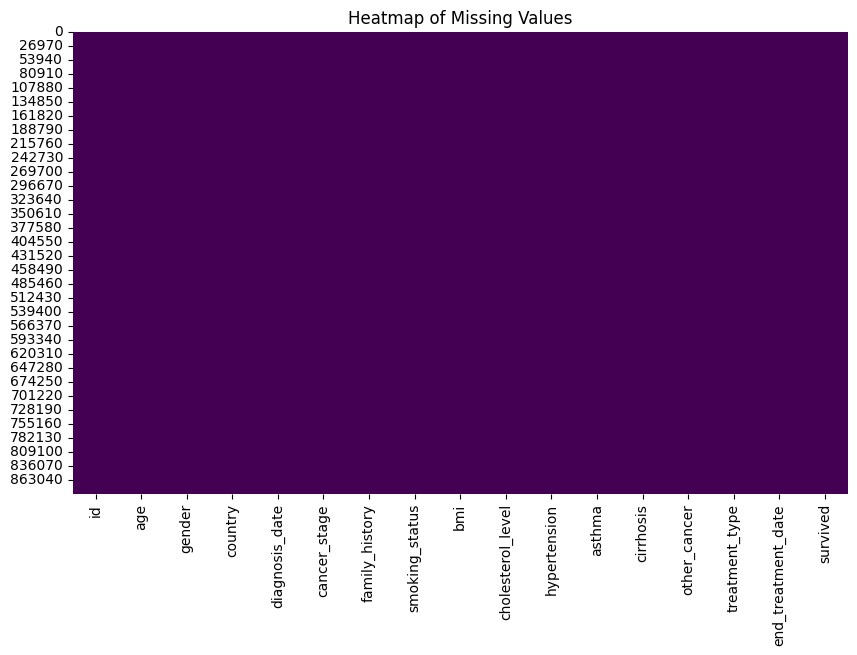

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()


In [ ]:
df.dtypes


,0
id,int64
age,float64
gender,object
country,object
diagnosis_date,object
cancer_stage,object
family_history,object
smoking_status,object
bmi,float64
cholesterol_level,int64


In [ ]:
print(df.columns)


Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_features = ['gender', 'country', 'cancer_stage','family_history','smoking_status','treatment_type']
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 2: Inspect the original data
print("Original unique values:")
print("gender:", df["gender"].unique())
print("cancer_stage:", df["cancer_stage"].unique())
print("family_history:", df["family_history"].unique())

# Step 3: Initialize LabelEncoders
le_gender = LabelEncoder()
le_cancer_stage = LabelEncoder()
le_family_history = LabelEncoder()

# Step 4: Clean and encode the columns
# Handle NaN and standardize values
df["gender"] = df["gender"].fillna("Unknown").astype(str).str.strip()
df["cancer_stage"] = df["cancer_stage"].fillna("Unknown").astype(str).str.strip()
df["family_history"] = df["family_history"].fillna("Unknown").astype(str).str.strip()

# Apply label encoding
df["gender"] = le_gender.fit_transform(df["gender"])
df["cancer_stage"] = le_cancer_stage.fit_transform(df["cancer_stage"])
df["family_history"] = le_family_history.fit_transform(df["family_history"])

# Step 5: Display the mappings and the first 5 rows
print("\nGender Mapping:", dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))
print("Cancer Stage Mapping:", dict(zip(le_cancer_stage.classes_, le_cancer_stage.transform(le_cancer_stage.classes_))))
print("Family History Mapping:", dict(zip(le_family_history.classes_, le_family_history.transform(le_family_history.classes_))))
print("\nFirst 5 rows of the DataFrame:")
print(df.head(5))

# Step 6: Check value distributions
print("\nValue Counts:")
print("Gender:", df["gender"].value_counts())
print("Cancer Stage:", df["cancer_stage"].value_counts())
print("Family History:", df["family_history"].value_counts())

Original unique values:
gender: [1 0]
cancer_stage: [0 2 3 1]
family_history: [1 0]

Gender Mapping: {'0': np.int64(0), '1': np.int64(1)}
Cancer Stage Mapping: {'0': np.int64(0), '1': np.int64(1), '2': np.int64(2), '3': np.int64(3)}
Family History Mapping: {'0': np.int64(0), '1': np.int64(1)}

First 5 rows of the DataFrame:
   id   age  gender      country diagnosis_date  cancer_stage  family_history  \
0   1  64.0       1       Sweden     2016-04-05             0               1   
1   2  50.0       0  Netherlands     2023-04-20             2               1   
2   3  65.0       0      Hungary     2023-04-05             2               1   
3   4  51.0       0      Belgium     2016-02-05             0               0   
4   5  37.0       1   Luxembourg     2023-11-29             0               0   

   smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  \
0  Passive Smoker  29.4                199             0       0          1   
1  Passive Smoker  41.2      

Encoded dataset:
    gender  cancer_stage  family_history
0       0             1               1
1       1             2               0
2       1             3               1
3       0             4               0
4       0             2               1


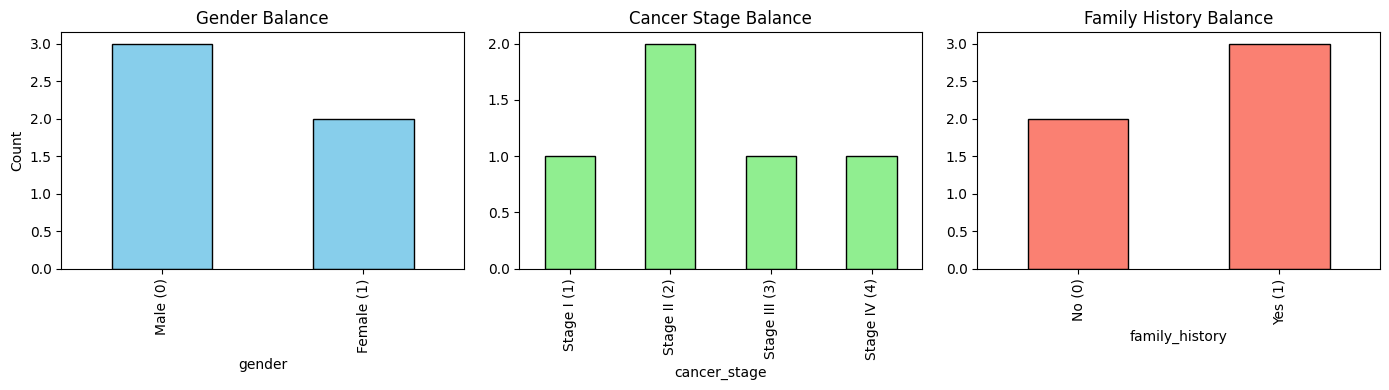

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset
data = {
    "gender": ["Male", "Female", "Female", "Male", "Male"],
    "cancer_stage": ["Stage I", "Stage II", "Stage III", "Stage IV", "Stage II"],
    "family_history": ["Yes", "No", "Yes", "No", "Yes"]
}

df = pd.DataFrame(data)

# ---- Label Encoding ----

# 1. Gender
gender_map = {"Male": 0, "Female": 1}
df["gender"] = df["gender"].map(gender_map)

# 2. Cancer stage
stage_map = {"Stage I": 1, "Stage II": 2, "Stage III": 3, "Stage IV": 4}
df["cancer_stage"] = df["cancer_stage"].map(stage_map)

# 3. Family history
fh_map = {"No": 0, "Yes": 1}
df["family_history"] = df["family_history"].map(fh_map)

print("Encoded dataset:\n", df)

# ---- Visualization: Class Balance ----
fig, axes = plt.subplots(1, 3, figsize=(14,4))

# Gender
df["gender"].value_counts().sort_index().plot(
    kind="bar", ax=axes[0], color="skyblue", edgecolor="black"
)
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(["Male (0)", "Female (1)"])
axes[0].set_title("Gender Balance")
axes[0].set_ylabel("Count")

# Cancer Stage
df["cancer_stage"].value_counts().sort_index().plot(
    kind="bar", ax=axes[1], color="lightgreen", edgecolor="black"
)
axes[1].set_xticks([0,1,2,3])
axes[1].set_xticklabels(["Stage I (1)", "Stage II (2)", "Stage III (3)", "Stage IV (4)"])
axes[1].set_title("Cancer Stage Balance")

# Family History
df["family_history"].value_counts().sort_index().plot(
    kind="bar", ax=axes[2], color="salmon", edgecolor="black"
)
axes[2].set_xticks([0,1])
axes[2].set_xticklabels(["No (0)", "Yes (1)"])
axes[2].set_title("Family History Balance")

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("C:\\Users\\NIL_07\\Downloads\\2025-Y2-S1-MLB-B4G2-08\\data\\raw\\Lung Cancer.csv")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

✅ Dataset loaded successfully!
Shape: (890000, 17)
   id   age  gender      country diagnosis_date cancer_stage family_history  \
0   1  64.0    Male       Sweden     2016-04-05      Stage I            Yes   
1   2  50.0  Female  Netherlands     2023-04-20    Stage III            Yes   
2   3  65.0  Female      Hungary     2023-04-05    Stage III            Yes   
3   4  51.0  Female      Belgium     2016-02-05      Stage I             No   
4   5  37.0    Male   Luxembourg     2023-11-29      Stage I             No   

   smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  \
0  Passive Smoker  29.4                199             0       0          1   
1  Passive Smoker  41.2                280             1       1          0   
2   Former Smoker  44.0                268             1       1          0   
3  Passive Smoker  43.0                241             1       1          0   
4  Passive Smoker  19.7                178             0       0          0   


In [3]:
missing_pct = (df.isnull().mean() * 100).round(2)
print("\nMissing values (% per column):\n", missing_pct)


Missing values (% per column):
 id                    0.0
age                   0.0
gender                0.0
country               0.0
diagnosis_date        0.0
cancer_stage          0.0
family_history        0.0
smoking_status        0.0
bmi                   0.0
cholesterol_level     0.0
hypertension          0.0
asthma                0.0
cirrhosis             0.0
other_cancer          0.0
treatment_type        0.0
end_treatment_date    0.0
survived              0.0
dtype: float64


In [5]:
X = df.select_dtypes(include=['float64', 'int64'])

# Handle case if no numeric columns are found
if X.shape[1] == 0:
    print("\n⚠️ No numeric columns found for PCA.")
else:
    print("\n✅ Numeric features selected for PCA:", list(X.columns))



✅ Numeric features selected for PCA: ['id', 'age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived']


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
pca = PCA(n_components=0.95)  # reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

In [ ]:
pca_df = pd.DataFrame(X_pca,columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

print("Reduced features:", X_pca.shape[1])


Reduced features: 8


In [14]:
print("\nExplained variance ratio (PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8):", pca.explained_variance_ratio_)


Explained variance ratio (PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8): [0.19410415 0.13406151 0.1113014  0.1111044  0.11097773 0.10871586
 0.10481366 0.09679979]


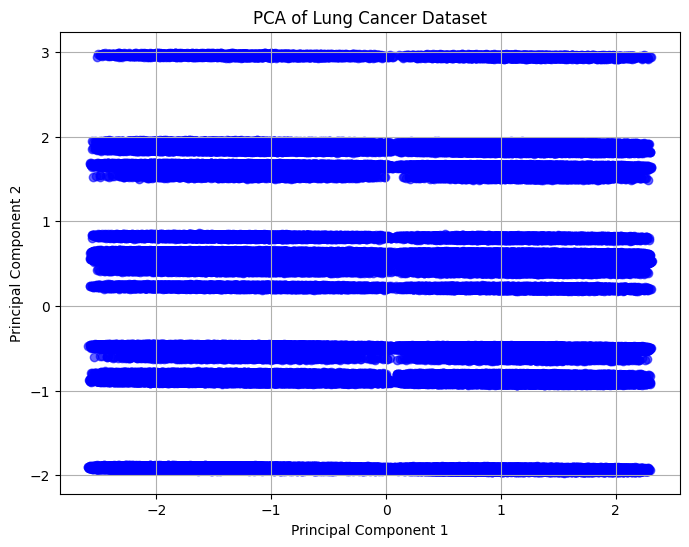

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, c='blue')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Lung Cancer Dataset")
plt.grid(True)
plt.show()
